**Для сдачи итоговой работы необходимы выполнить 7 заданий из 11.**

**Проектная работа по модулю “Математика и статистика вPython”**


1. Загрузить файл hr.csv.

2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

3. Рассчитать и визуализировать корреляционную матрицу для переменных.

4. Визуализировать несколько взаимосвязей между переменными.

5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

6. Рассчитать сколько работников работает в каждом департаменте.

7. Показать распределение сотрудников по зарплатам.

8. Показать распределение сотрудников по зарплатам совместно с департаментами.

9. Сколько сотрудников покинули компанию.

10. Проверить несколько гипотез для данных,чтобы понять почему сотрудники покидают компанию.

11. Загрузить результат (в формате .ipynbноутбука) в репозиторий. Разместить ссылку на репозиторийв лкна сайте

Пояснения к колонкам
* satisfaction_level - уровень удовлетворенности работой
* last_evaluation - уровень последней оценки работы
* number_project -количество проектов
* average_montly_hours - среднее количество часов в месяц работы
* time_spend_company - шкала от 2 до 10, отражающее время работы в компании
* Work_accident - наличие инцидента на рабочем месте
* left - ушел ли работник или нет
* promotion_last_5years - факт повышения в течение 5 лет
* sales - департамент работника
* salary - уровень зарплаты

# 1. Загрузить файл hr.csv.

In [1]:
import pandas as pd

In [2]:
ds = pd.read_csv('HR.csv')

# 2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [3]:
stat_ds = ds.agg(['mean','median','min','max','std'])
stat_ds.loc['mode'] = ds.mode().loc[0]
stat_ds.loc['mode','average_montly_hours'] = ds.mode()['average_montly_hours'].mean()
stat_ds = stat_ds.T

In [4]:
stat_ds

,mean,median,min,max,std,mode
satisfaction_level,0.612834,0.64,0.09,1,0.248631,0.1
last_evaluation,0.716102,0.72,0.36,1,0.171169,0.55
number_project,3.80305,4,2,7,1.23259,4
average_montly_hours,201.05,200,96,310,49.9431,145.5
time_spend_company,3.49823,3,2,10,1.46014,3
Work_accident,0.14461,0,0,1,0.351719,0
left,0.238083,0,0,1,0.425924,0
promotion_last_5years,0.0212681,0,0,1,0.144281,0
sales,NaN,NaN,IT,technical,NaN,sales
salary,NaN,NaN,high,medium,NaN,low


# 3. Рассчитать и визуализировать корреляционную матрицу для переменных.

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

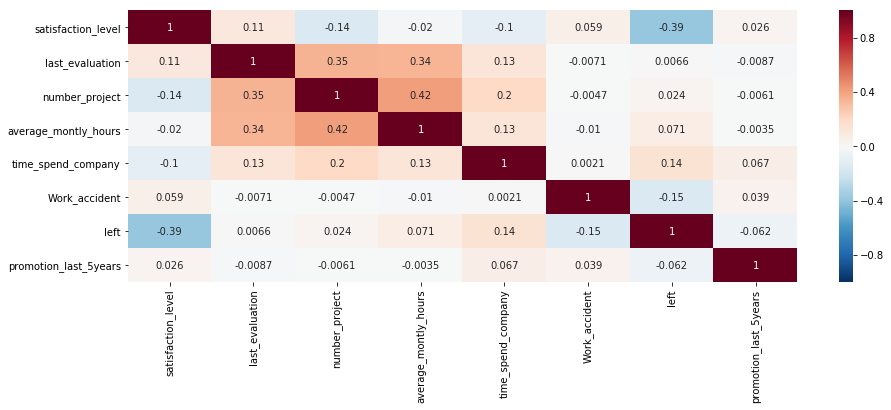

In [6]:
plt.figure(figsize=(15,5))
sns.heatmap(ds.corr(), cmap='RdBu_r', annot=True, vmin=-1, vmax=1)

# 4. Визуализировать несколько взаимосвязей между переменными.

/home/egor/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


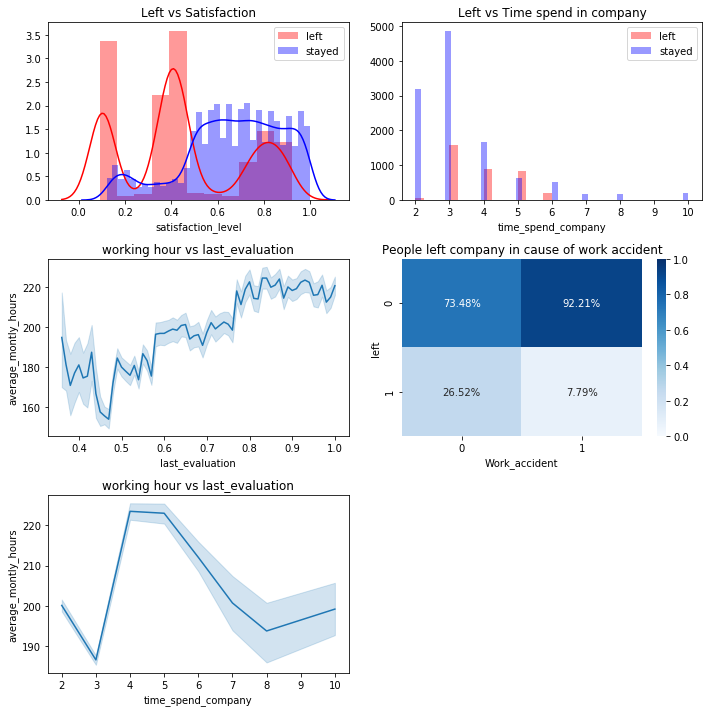

In [7]:
plt.figure(figsize=(10,10))

plt.subplot(321)
sns.distplot(ds[ds['left']==1]['satisfaction_level'], label='left', color='Red')
sns.distplot(ds[ds['left']==0]['satisfaction_level'], label='stayed', color='Blue')
plt.title('Left vs Satisfaction')
plt.legend()

plt.subplot(322)
sns.distplot(ds[ds['left']==1]['time_spend_company'], label='left', color='Red',kde=False)
sns.distplot(ds[ds['left']==0]['time_spend_company'], label='stayed', color='Blue',kde=False)
plt.title('Left vs Time spend in company')
plt.legend()

plt.subplot(323)
sns.lineplot(x='last_evaluation',y='average_montly_hours',data=ds)
plt.title('working hour vs last_evaluation')

plt.subplot(324)
cds = ds.pivot_table(index='left',columns='Work_accident', values='sales',aggfunc='count')
cds = cds/ds['Work_accident'].value_counts()
plt.title('People left company in cause of work accident', )
sns.heatmap(cds, vmin=0, vmax=1, annot=True, cmap='Blues', fmt='.2%')

plt.subplot(325)
sns.lineplot(x='time_spend_company',y='average_montly_hours',data=ds)
plt.title('working hour vs last_evaluation')

plt.tight_layout()
plt.show()

# 5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

In [8]:
import numpy as np

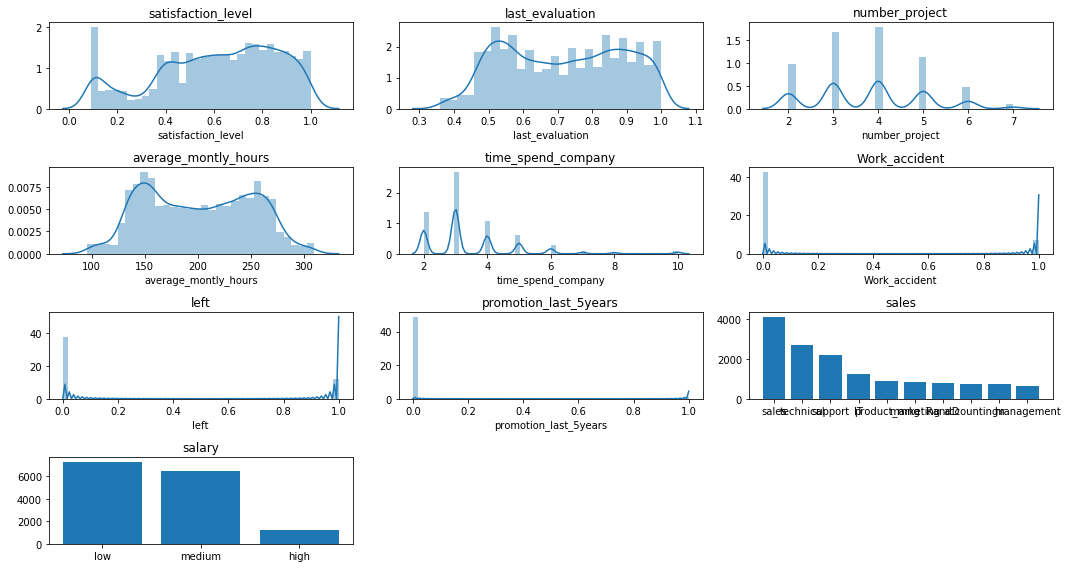

In [9]:
plt.figure(figsize=(15,8))
for idx, f in enumerate(ds.columns):
    plt.subplot(4,3,idx+1)
    if ds[f].dtype == np.dtype('O'):
        plt.bar(ds[f].value_counts().index,ds[f].value_counts())
    else:
        sns.distplot(ds[f])
    plt.title(f)
plt.tight_layout()
plt.show()

In [10]:
from scipy.stats import normaltest

In [11]:
from scipy.stats import ttest_ind
from itertools import combinations

In [12]:
for f in ds.columns:
    try:
        print(f, normaltest(ds[f]).pvalue)
    except:
        pass

satisfaction_level 1.6412924703269606e-261
last_evaluation 0.0
number_project 3.0971011101662827e-120
average_montly_hours 0.0
time_spend_company 0.0
Work_accident 0.0
left 0.0
promotion_last_5years 0.0


/home/egor/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


Ни одна из величин не распределена нормально. То есть не выполняется базовое условие для t-тестирования.

Но ради интереса попробуем оценить зависимость среднего рабочего времени и удовлетворённости сотрудника от его зарплаты.

In [13]:
stats_dict = {}

f = 'average_montly_hours'
for a,b in combinations(['low','medium','high'],2):
    for f in ['average_montly_hours', 'satisfaction_level']:
        stats_dict[(f,a,b)] = ttest_ind(ds[ds['salary']==a][f], ds[ds['salary']==b][f]).pvalue    

stats_dict = {k:[v, v<0.05/len(stats_dict)] for k,v in stats_dict.items()} # Поправка на множественные гипотезы

In [14]:
stats_dict

{('average_montly_hours', 'low', 'medium'): [0.6898945822032512, False],
 ('satisfaction_level', 'low', 'medium'): [8.378854439781171e-07, True],
 ('average_montly_hours', 'low', 'high'): [0.4661023478267259, False],
 ('satisfaction_level', 'low', 'high'): [1.9413281282548522e-06, True],
 ('average_montly_hours', 'medium', 'high'): [0.3343745714238685, False],
 ('satisfaction_level', 'medium', 'high'): [0.03738816176204982, False]}

low 0.6007531437944199
medium 0.6218166304685063
high 0.6374696847211003


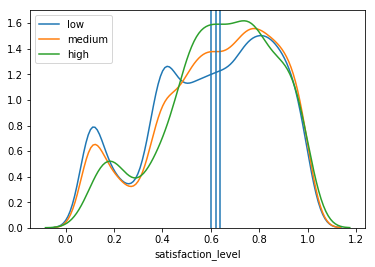

In [15]:
for v in ['low','medium','high']:
    sns.distplot(ds[ds['salary']==v]['satisfaction_level'],label=v,hist=False)
    plt.axvline(ds[ds['salary']==v]['satisfaction_level'].mean())
    print(v, ds[ds['salary']==v]['satisfaction_level'].mean())
plt.legend()
plt.show()

На уровне значимости 0.05 (для 6 гипотез с поправкой FWER $\alpha$=0.05/6=0.0083) нулевую гипотезу можно отвергнуть для равенства срених уровней удовлетворённости людей с низкой зарплатой и людей со средней и высокой зарплатами. Т.е. работники с низкими зарплатами статистически важно менее удовлетворены работой, чем люди их более высокооплачиваемые коллеги.

# 6. Рассчитать сколько работников работает в каждом департаменте.

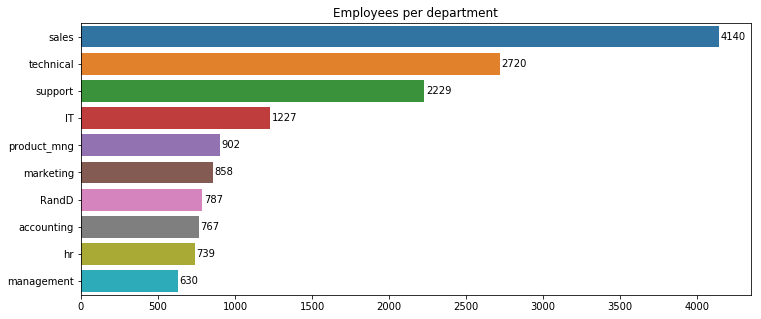

In [16]:
cds = ds['sales'].value_counts()

plt.figure(figsize=(12,5))
sns.barplot(x=cds.values, y=cds.index)
for y,x in enumerate(cds.values):
    plt.text(x+10,y+0.1 ,x)
plt.title('Employees per department')
plt.show()

# 7. Показать распределение сотрудников по зарплатам.

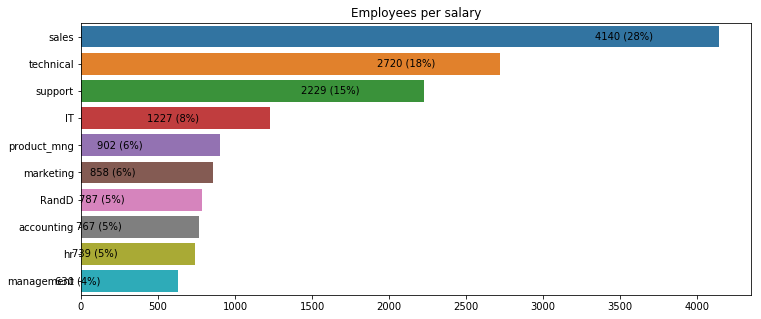

In [17]:
plt.figure(figsize=(12,5))
sns.barplot(x=cds.values, y=cds.index)
for y,x in enumerate(cds.values):
    plt.text(x-800,y+0.1 ,f'{x} ({x/len(ds):.0%})')
plt.title('Employees per salary')
plt.show()

# 8. Показать распределение сотрудников по зарплатам совместно с департаментами.

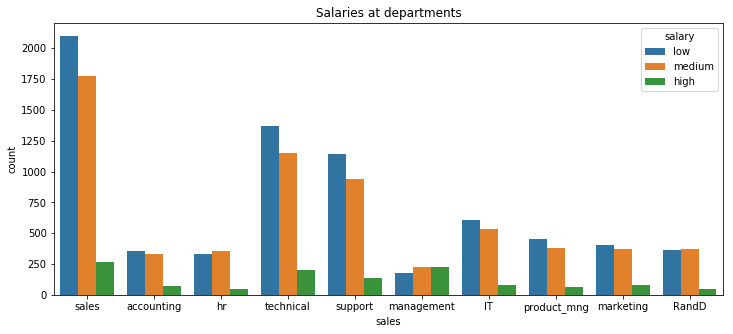

In [18]:
plt.figure(figsize=(12,5))
sns.countplot(x='sales',hue='salary',data=ds)
plt.xticks(rotation=0)
plt.title('Salaries at departments')
plt.show()

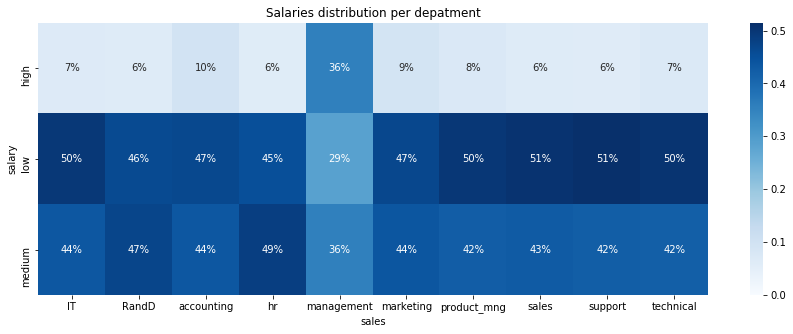

In [19]:
plt.figure(figsize=(15,5))
cds = ds.pivot_table(index='salary',columns='sales', values='left', aggfunc='count')
cds = cds/cds.sum()
sns.heatmap(cds, cmap='Blues', annot=True, fmt='.0%', vmin=0)
plt.title('Salaries distribution per depatment')
plt.show()

# 9. Сколько сотрудников покинули компанию.

In [20]:
ds['left'].agg(['sum','mean']).rename({'sum':'Всего покинуло', 'mean':'Доля от всех сотрудников'})

Всего покинуло              3571.000000
Доля от всех сотрудников       0.238083
Name: left, dtype: float64

# 10. Проверить несколько гипотез для данных,чтобы понять почему сотрудники покидают компанию.

# 11. Загрузить результат (в формате .ipynbноутбука) в репозиторий. Разместить ссылку на репозиторийв лкна сайте